# Principal Component Analysis & Manifold Visualizations

### Notebook Summary:

#### Objective: provide visualizations of PCA and Manidolds for differently transformed datasets as a means of data exploration 

* Datasets used include the original listings dataset, the augmented dataset, the normalized augmented dataset, the standardized augmented dataset, the normalized augmented dataset after it had been augmented further with ratio features (reference modeling notebooks for more info)

#### Conclusions: 
* The best PCA/Manifolds

In [ ]:
%store -r X_ratios
%store -r X_normed
%store -r X_test
%store -r y_normed
%store -r y_test
%store -r listings
%store -r X_scaled
%store -r y_scaled

Exploring Original Data with PCA

In [117]:
from sklearn.decomposition import PCA

In [ ]:
data = X_inters_log[cols_log]

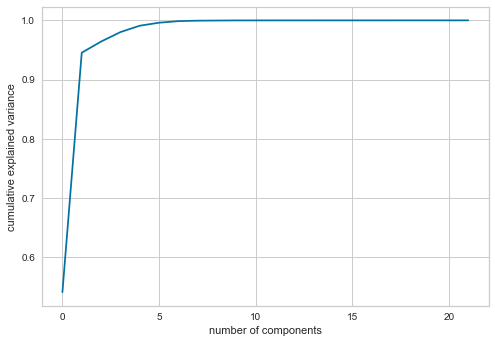

In [118]:
#Now using all components to see how explained var ratio behaves as number of components increses
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

It looks like 6 components would explain all the variance 

In [119]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print 'Explained Variance: '
print pd.Series(pca.explained_variance_).head(6)
print '\n'
print 'Explained Variance Ratio: '
print pd.Series(pca.explained_variance_ratio_).head(6)

Explained Variance: 
0   25851.517
1   19329.850
2     898.141
3     762.690
4     515.621
5     243.465
dtype: float64


Explained Variance Ratio: 
0   0.541
1   0.404
2   0.019
3   0.016
4   0.011
5   0.005
dtype: float64


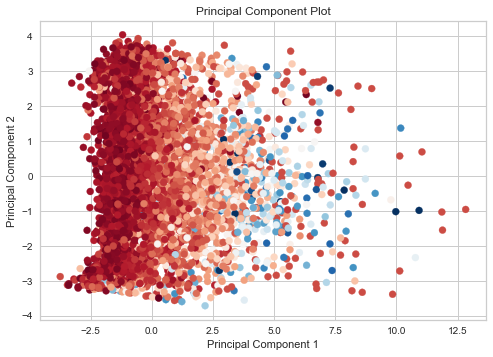

In [120]:
from yellowbrick.features.pca import PCADecomposition
visualizer = PCADecomposition(n_components=10, scale=True, color=y)
visualizer.fit(data)
visualizer.transform(data)
visualizer.poof()

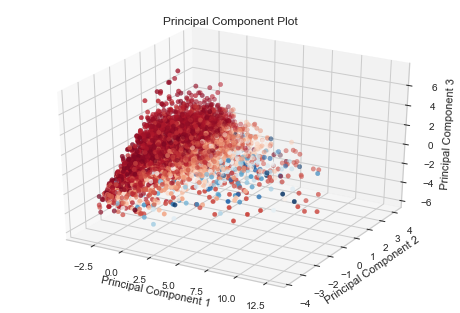

In [121]:
visualizer = PCADecomposition(scale=True,n_components=10, proj_dim=3, color = y)
visualizer.fit(data)
visualizer.transform(data)
visualizer.poof()

Working with Expanded Dataset - Scaled

In [ ]:
data = X_scaled
y = y_scaled

In [20]:
n_comps = 137
pca = PCA(n_components=n_comps)
model_fit = pca.fit(data)
X_transform = model_fit.transform(data)
print'Score for PCA with %i Components: %i' %(n_comps,model_fit.score(data))

Score for PCA with 137 Components: 348745170021409


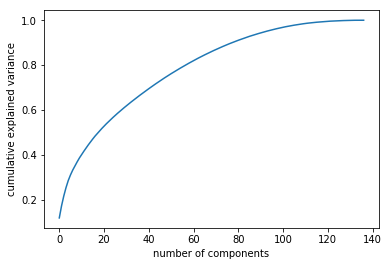

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Insight: not clear where the "elbow" is here but taking 60 components should give us most of the explained variance

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print 'Explained Variance: '
print pd.Series(model_fit.explained_variance_).head()
print '\n'
print 'Explained Variance Ratio: '
print pd.Series(model_fit.explained_variance_ratio_).head()

Explained Variance: 
0   15.293
1    6.883
2    5.675
3    4.824
4    4.079
dtype: float64


Explained Variance Ratio: 
0   0.119
1   0.053
2   0.044
3   0.037
4   0.032
dtype: float64


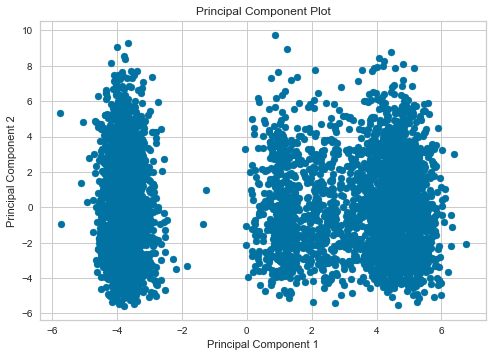

In [24]:
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.importances import FeatureImportances


visualizer = PCADecomposition(n_components=60, scale=False, colormap='autumn')
visualizer.fit(data)
visualizer.transform(data)
visualizer.poof()

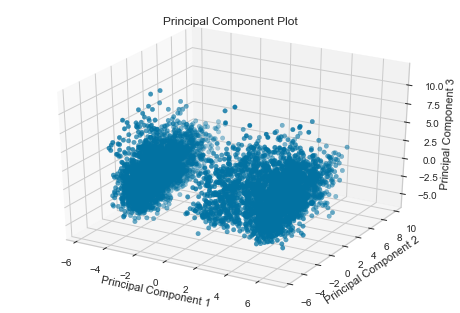

In [25]:
visualizer = PCADecomposition(scale=False,n_components=60, proj_dim=3, colormap='autumn')
visualizer.fit(X_scaled)
visualizer.transform(X_scaled)
visualizer.poof()

In [66]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

First we run a test pipeline to see what the optimal number of components will be with GridSearchCV. Then we run the actual regression to make predictions

In [36]:
test_lr = linear_model.LinearRegression()

In [37]:
pca = PCA()
comps = [40,60,80]

In [38]:
pipe = Pipeline(steps=[('pca', pca), ('reg', test_lr)])

In [42]:
estimator = GridSearchCV(pipe, dict(pca__n_components=comps), cv=3)

In [43]:
estimator.fit(data, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [40, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
estimator.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Insight: 60 components is the confirmed best number

In [48]:
estimator.best_estimator_.named_steps['reg']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now actually running the regression on the reduced dataset

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [55]:
pca = PCA(n_components=60)
lr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
pipe = Pipeline(steps=[('pca', pca), ('reg', lr)])

In [57]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [58]:
pipe.predict(X_test)

array([-0.31018055, -0.82887958,  0.37418511, ..., -0.21445269,
       -0.59376273, -0.51714025])

In [65]:
pipe.score(X_test, y_test)

0.5804404543908278

Insight: with this rudimental, untuned linear regression on 60 principal components we obtained an R2 of 58%

In [72]:
#Just checking that it's the same as above...
print 'R2 with PCA with 60 components: ', r2_score(y_test,pipe.predict(X_test))

R2 with PCA with 60 components:  0.5804404543908278


In [73]:
print 'RMSE with PCA with 60 components: ', mean_squared_error(y_test,pipe.predict(X_test))

RMSE with PCA with 60 components:  0.45586200014324735


Redoing the above with normalized data

In [ ]:
data = X_normed
y = y_normed

In [20]:
n_comps = 137
pca = PCA(n_components=n_comps)
model_fit = pca.fit(data)
X_transform = model_fit.transform(data)
print'Score for PCA with %i Components: %i' %(n_comps,model_fit.score(data))

Score for PCA with 137 Components: 348745170021409


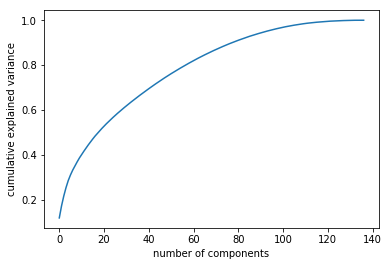

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Insight: not clear where the "elbow" is here but taking 60 components should give us most of the explained variance

In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print 'Explained Variance: '
print pd.Series(model_fit.explained_variance_).head()
print '\n'
print 'Explained Variance Ratio: '
print pd.Series(model_fit.explained_variance_ratio_).head()

Explained Variance: 
0   15.293
1    6.883
2    5.675
3    4.824
4    4.079
dtype: float64


Explained Variance Ratio: 
0   0.119
1   0.053
2   0.044
3   0.037
4   0.032
dtype: float64


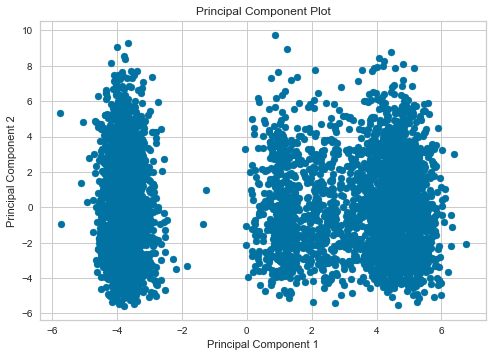

In [24]:
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.importances import FeatureImportances


visualizer = PCADecomposition(n_components=60, scale=False, colormap='autumn')
visualizer.fit(data)
visualizer.transform(data)
visualizer.poof()

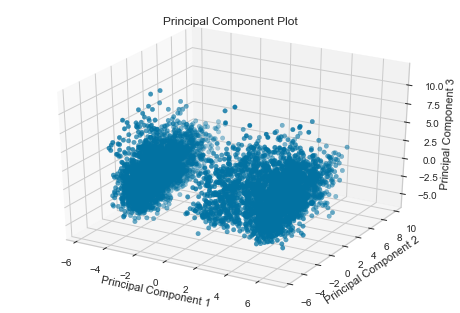

In [25]:
visualizer = PCADecomposition(scale=False,n_components=60, proj_dim=3, colormap='autumn')
visualizer.fit(data)
visualizer.transform(data)
visualizer.poof()

In [66]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

First we run a test pipeline to see what the optimal number of components will be with GridSearchCV. Then we run the actual regression to make predictions

In [36]:
test_lr = linear_model.LinearRegression()

In [37]:
pca = PCA()
comps = [40,60,80]

In [38]:
pipe = Pipeline(steps=[('pca', pca), ('reg', test_lr)])

In [42]:
estimator = GridSearchCV(pipe, dict(pca__n_components=comps), cv=3)

In [43]:
estimator.fit(data, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [40, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
estimator.best_estimator_

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Insight: 60 components is the confirmed best number

In [48]:
estimator.best_estimator_.named_steps['reg']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now actually running the regression on the reduced dataset

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, y)

In [55]:
pca = PCA(n_components=60)
lr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
pipe = Pipeline(steps=[('pca', pca), ('reg', lr)])

In [57]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [58]:
pipe.predict(X_test)

array([-0.31018055, -0.82887958,  0.37418511, ..., -0.21445269,
       -0.59376273, -0.51714025])

In [65]:
pipe.score(X_test, y_test)

0.5804404543908278

Insight: with this rudimental, untuned linear regression on 60 principal components we obtained an R2 of 58%

In [72]:
#Just checking that it's the same as above...
print 'R2 with PCA with 60 components: ', r2_score(y_test,pipe.predict(X_test))

R2 with PCA with 60 components:  0.5804404543908278


In [73]:
print 'RMSE with PCA with 60 components: ', mean_squared_error(y_test,pipe.predict(X_test))

RMSE with PCA with 60 components:  0.45586200014324735


Manifolds

Using scaled data

In [ ]:
data = X_scaled
y = y_scaled

In [68]:
#Trying random feautres now
random_features = list(X_scaled.iloc[:,20:26].columns)

AttributeError: 'TSNE' object has no attribute 'transform'

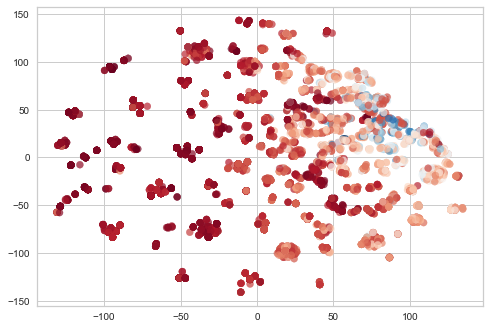

In [66]:
from yellowbrick.features.manifold import Manifold
visualizer = Manifold(manifold='tsne', target='continuous')
visualizer.fit_transform(data[random_features],y)
visualizer.poof()

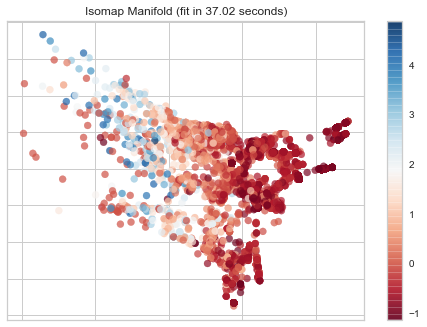

In [69]:
from yellowbrick.features.manifold import Manifold
visualizer = Manifold(manifold='isomap', target='continuous')
visualizer.fit_transform(data[random_features],y)
visualizer.poof()

Now doing isomap again but this time using the F score to take only highest three features individually correlated with y_scaled - try other methods for score_func

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
model = Pipeline([
("selectk", SelectKBest(k=3, score_func=f_classif)),
("viz", Manifold(manifold='isomap', target='continuous')),
])

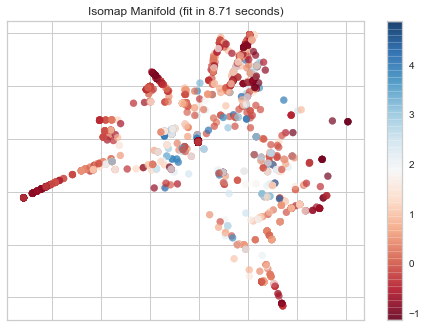

In [59]:
model.fit(data[random_features],y)
model.named_steps['viz'].poof()

Now passing Locally Linear Embedding - does this help us for linaer regression?

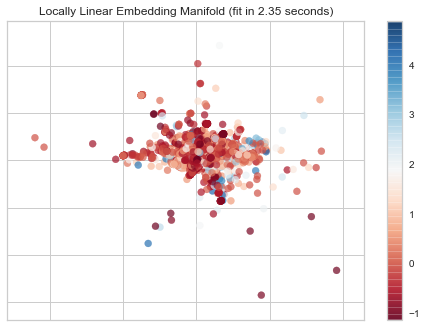

In [70]:
from yellowbrick.features.manifold import Manifold
visualizer = Manifold(manifold='lle', target='continuous')
visualizer.fit_transform(data[random_features],y)
visualizer.poof()